In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import karateclub
from karateclub.dataset import GraphReader
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# **Github Dataset**

In [ ]:
reader = GraphReader("github")
graph = reader.get_graph()
y = reader.get_target()

In [ ]:
print(nx.info(graph))

Graph with 37700 nodes and 289003 edges


# GLEE

AUC: 0.5000
Precision: 0.000
Recall: 0.000
Accuracy: 0.737
F1 Score: 0.000


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


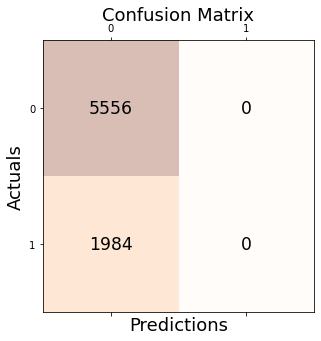

In [ ]:
from karateclub import GLEE
model = GLEE()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

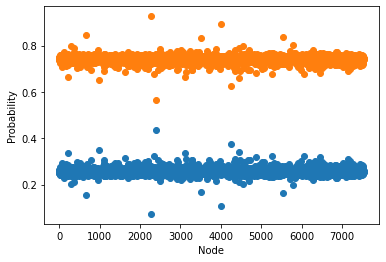

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.7064
Precision: 0.000
Recall: 0.000
Accuracy: 0.737
F1 Score: 0.000


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


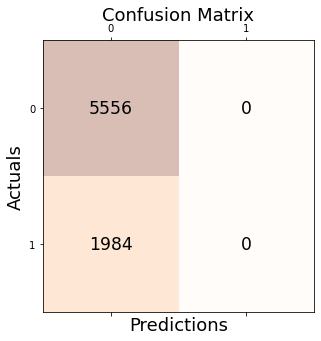

In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

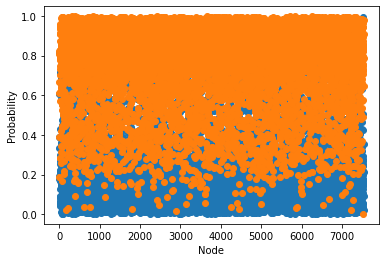

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# Walklets

AUC: 0.7821
Precision: 0.781
Recall: 0.627
Accuracy: 0.856
F1 Score: 0.696


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


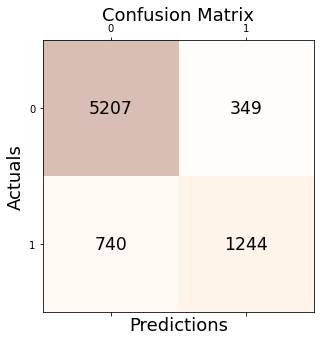

In [ ]:
from karateclub import Walklets
model = Walklets()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

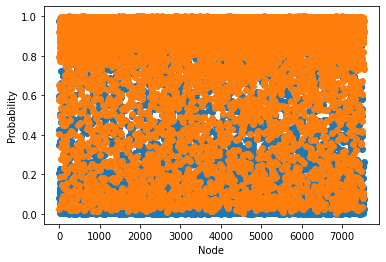

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.7688
Precision: 0.781
Recall: 0.627
Accuracy: 0.856
F1 Score: 0.696


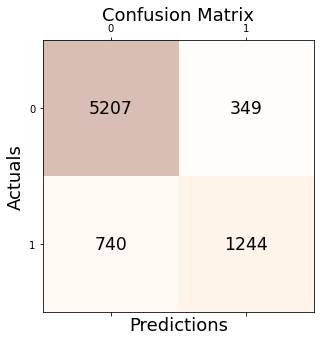

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

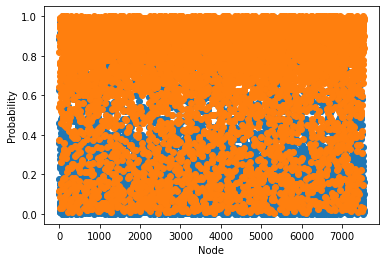

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# GraRep

In [ ]:
from karateclub import GraRep
model = GraRep()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

# DeepWalk

AUC: 0.7604
Precision: 0.763
Recall: 0.586
Accuracy: 0.843
F1 Score: 0.663


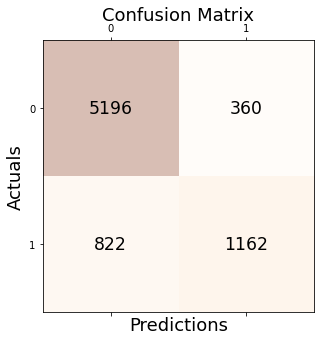

In [ ]:
from karateclub import DeepWalk
model = DeepWalk()
model.fit(graph)
X = model.get_embedding()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = downstream_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

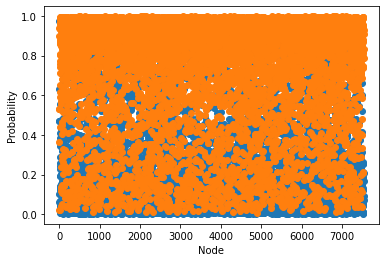

In [ ]:
y_hat = downstream_model.predict_proba(X_test)[:,1]
y_hat_2 = downstream_model.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")

AUC: 0.6112
Precision: 0.763
Recall: 0.586
Accuracy: 0.843
F1 Score: 0.663


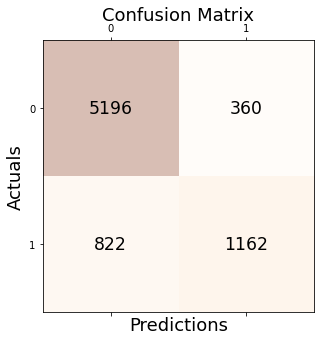

In [ ]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('AUC: {:.4f}'.format(auc))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0, 0.5, 'Probability')

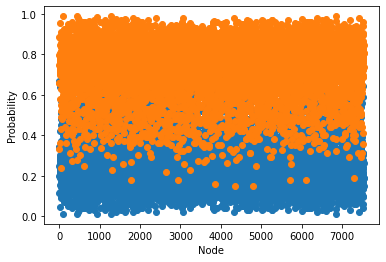

In [ ]:
y_hat = clf.predict_proba(X_test)[:,1]
y_hat_2 = clf.predict_proba(X_test)[:,0]
plt.scatter(np.arange(len(y_hat)), y_hat)
plt.scatter(np.arange(len(y_hat_2)), y_hat_2)
plt.xlabel("Node")
plt.ylabel("Probability")